Данные о проблемах подбора тиммейтов:
           game  goal_mismatch_rate  experience_gap_hours  toxicity_rate  \
0           CS2                  72                  1500             48   
1        Dota 2                  61                   600             42   
2           LoL                  55                   250             45   
3      Valorant                  45                   300             44   
4   Rainbow Six                  67                   550             43   
5  Apex Legends                  40                   420             20   
6          PUBG                  27                   240             15   
7         Other                  16                   100              7   

   quit_due_to_toxicity  rating_disparity_percent  
0                    15                        21  
1                    18                        17  
2                    20                        22  
3                    12                        16  
4                

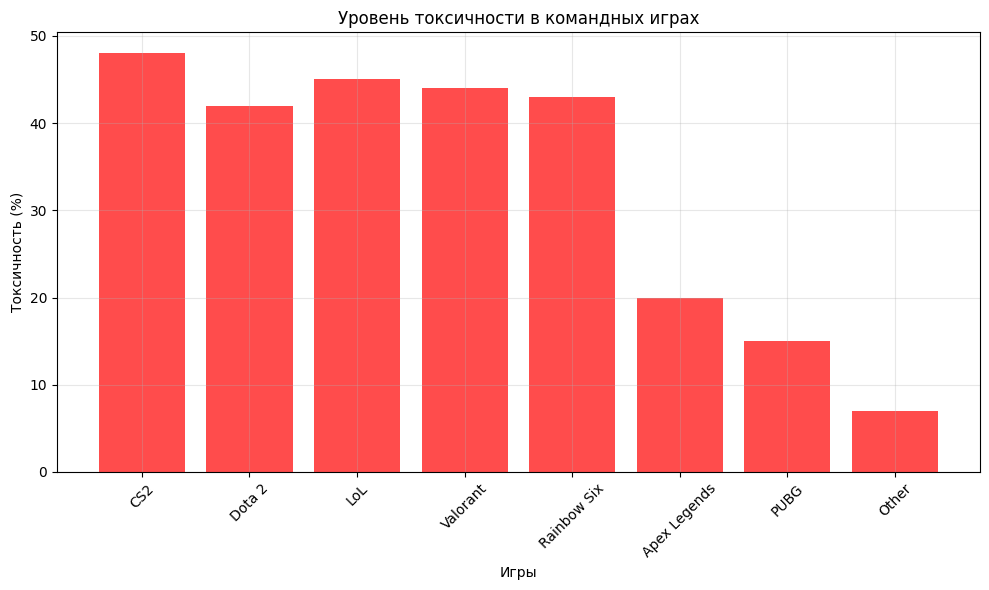

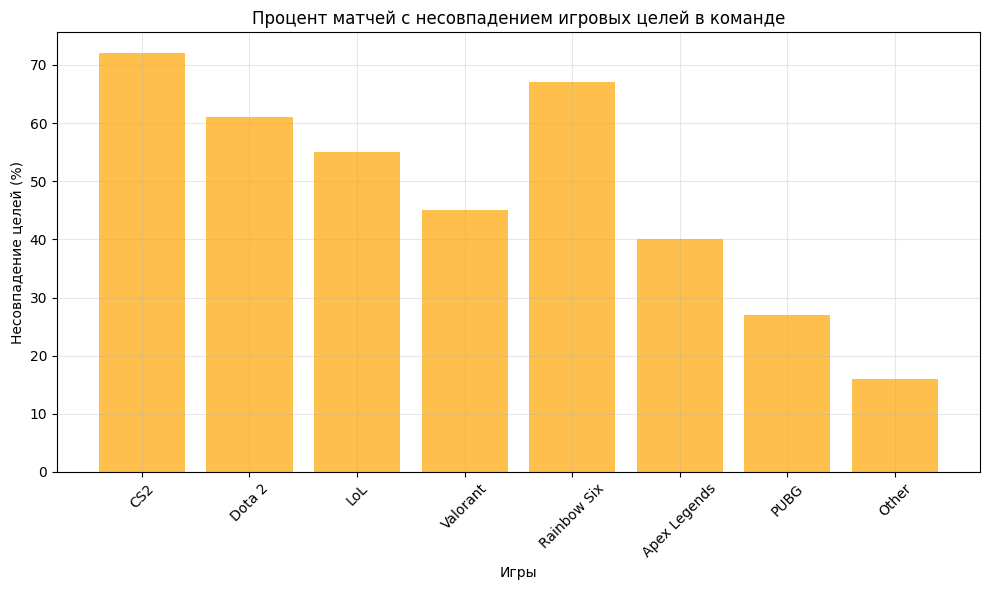

/tmp/ipython-input-1807361915.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(games, rotation=45)
/tmp/ipython-input-1807361915.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(games, rotation=45)


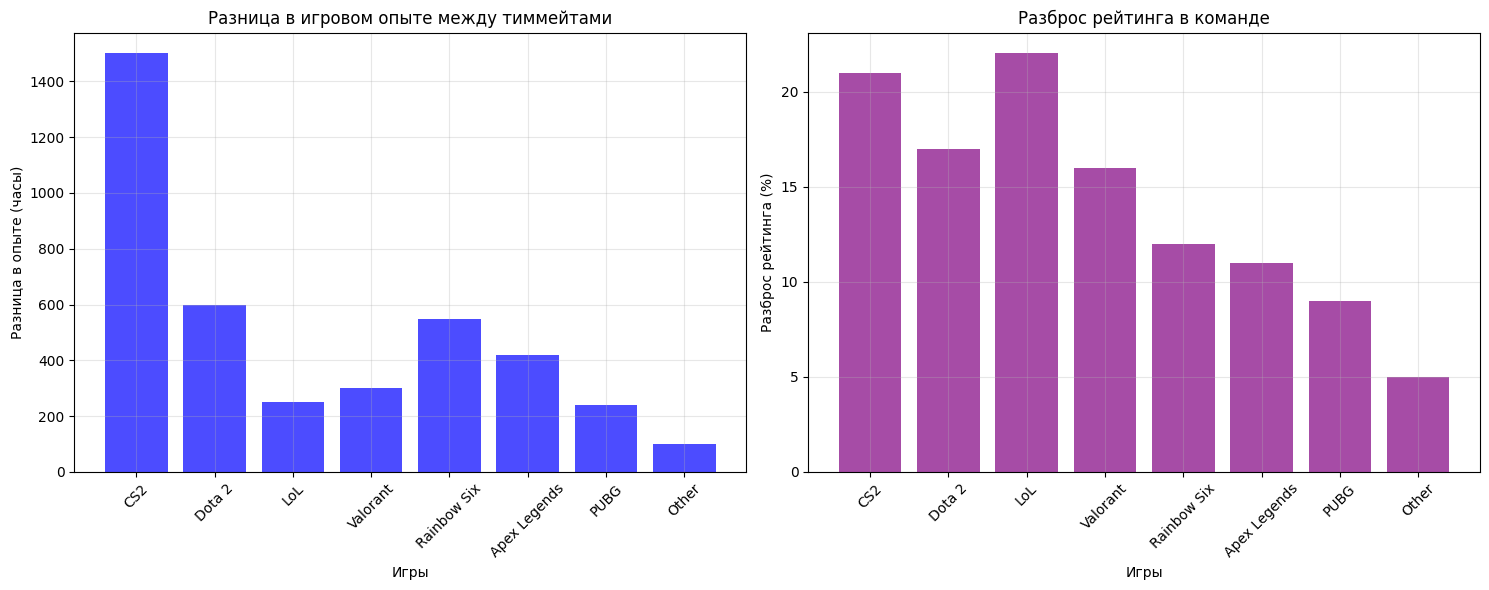

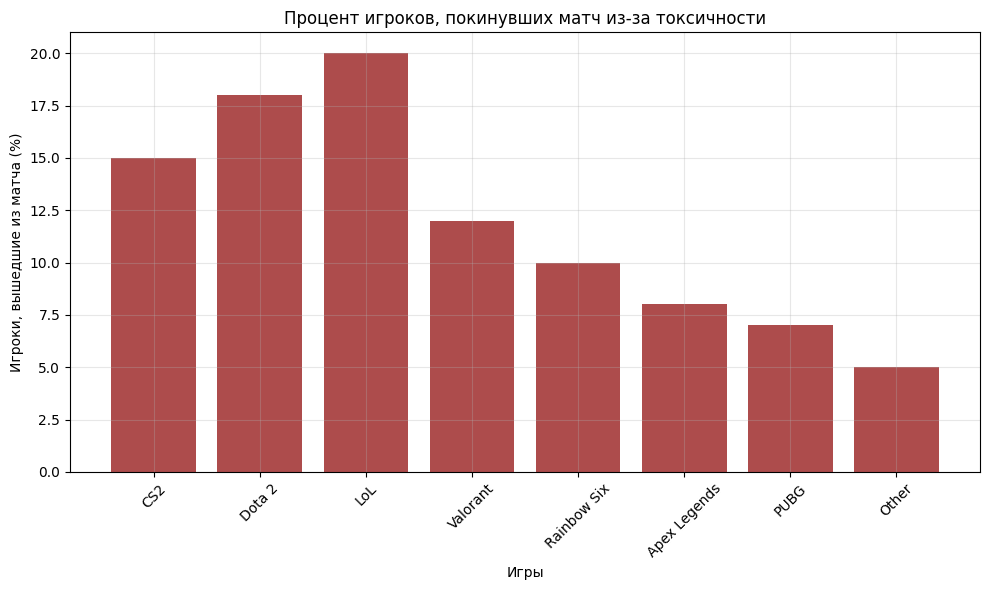

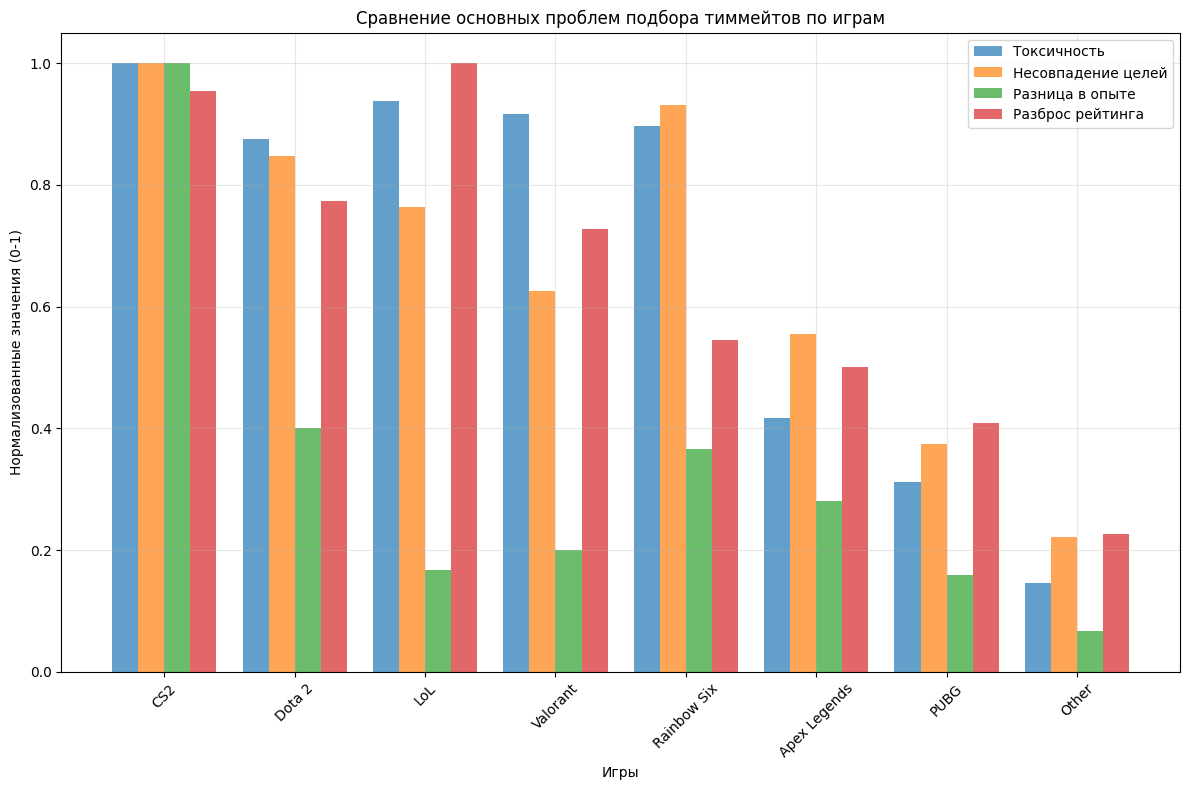

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

with open("/content/data.json", 'r', encoding='utf-8') as f:
    current_problems_data = json.load(f)

df = pd.DataFrame(current_problems_data)
print("Данные о проблемах подбора тиммейтов:")
print(df)


plt.figure(figsize=(10, 6))
games = df['game']
toxicity = df['toxicity_rate']

plt.bar(games, toxicity, color='red', alpha=0.7)
plt.xlabel('Игры')
plt.ylabel('Токсичность (%)')
plt.title('Уровень токсичности в командных играх')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
goal_mismatch = df['goal_mismatch_rate']

plt.bar(games, goal_mismatch, color='orange', alpha=0.7)
plt.xlabel('Игры')
plt.ylabel('Несовпадение целей (%)')
plt.title('Процент матчей с несовпадением игровых целей в команде')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.bar(games, df['experience_gap_hours'], alpha=0.7, color='blue')
ax1.set_xlabel('Игры')
ax1.set_ylabel('Разница в опыте (часы)')
ax1.set_title('Разница в игровом опыте между тиммейтами')
ax1.set_xticklabels(games, rotation=45)
ax1.grid(True, alpha=0.3)


ax2.bar(games, df['rating_disparity_percent'], alpha=0.7, color='purple')
ax2.set_xlabel('Игры')
ax2.set_ylabel('Разброс рейтинга (%)')
ax2.set_title('Разброс рейтинга в команде')
ax2.set_xticklabels(games, rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
quit_toxicity = df['quit_due_to_toxicity']

plt.bar(games, quit_toxicity, color='darkred', alpha=0.7)
plt.xlabel('Игры')
plt.ylabel('Игроки, вышедшие из матча (%)')
plt.title('Процент игроков, покинувших матч из-за токсичности')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

normalized_toxicity = df['toxicity_rate'] / df['toxicity_rate'].max()
normalized_mismatch = df['goal_mismatch_rate'] / df['goal_mismatch_rate'].max()
normalized_experience = df['experience_gap_hours'] / df['experience_gap_hours'].max()
normalized_rating = df['rating_disparity_percent'] / df['rating_disparity_percent'].max()

x = np.arange(len(games))
width = 0.2

plt.bar(x - width*1.5, normalized_toxicity, width, label='Токсичность', alpha=0.7)
plt.bar(x - width*0.5, normalized_mismatch, width, label='Несовпадение целей', alpha=0.7)
plt.bar(x + width*0.5, normalized_experience, width, label='Разница в опыте', alpha=0.7)
plt.bar(x + width*1.5, normalized_rating, width, label='Разброс рейтинга', alpha=0.7)

plt.xlabel('Игры')
plt.ylabel('Нормализованные значения (0-1)')
plt.title('Сравнение основных проблем подбора тиммейтов по играм')
plt.xticks(x, games, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()